In [19]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('doenca_hepatica.csv')

# Conjunto de dados de “doença hepática”


### Contexto

Os pacientes com doença hepática têm aumentado continuamente devido ao consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados e drogas. Este conjunto de dados foi usado para avaliar algoritmos de previsão em um esforço para reduzir a carga sobre os médicos.

### Informações do conjunto de dados

Este conjunto de dados contém 416 registros de pacientes com doença hepática e 167 pacientes sem doença hepática. O conjunto de dados foi coletado no nordeste de Andhra Pradesh, na Índia. A tarefa se resume a classificar um paciente em "com doença hepática" ou "sem doença hepática".

- Informações de atributos

1. **Age**: idade do paciente
2. **Gender**: gênero do paciente
3. **Total_Bilirubin**: Bilirrubina total
4. **Direct_Bilirubin**: Bilirrubina direta
5. **Alkaline_Phosphotase**: Fosfatase Alcalina
6. **Alamine_Aminotransferase**: Alanina Aminotransferase
7. **Aspartate_Aminotransferase**: Aspartato Aminotransferase
8. **Total_Protiens**: proteínas Totais
9. **Albumin**: Albumina
10. **Albumin_and_Globulin_Ratio**: proporção de albumina e globulina
11. **Dataset**: campo usado para dividir os dados em dois conjuntos (paciente com doença hepática ou sem doença)

Obs.: Qualquer paciente com idade superior a 89 anos é listado como tendo "90" anos de idade

# Analise dos dados

In [21]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [23]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [16]:
from pandas_profiling import ProfileReport

In [16]:
profile = ProfileReport(df, title="doenca_hepatica", explorative=True)
profile.to_file("doenca_hepatica.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Seleção dos dados

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y= df['Dataset']
X = df[['Age', 'Gender', 'Total_Protiens','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Albumin',
       'Albumin_and_Globulin_Ratio']]

In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [27]:
X

,Age,Gender,Total_Protiens,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,6.8,0.7,0.1,187,16,18,3.3,0.90
1,62,Male,7.5,10.9,5.5,699,64,100,3.2,0.74
2,62,Male,7.0,7.3,4.1,490,60,68,3.3,0.89
3,58,Male,6.8,1.0,0.4,182,14,20,3.4,1.00
4,72,Male,7.3,3.9,2.0,195,27,59,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,5.9,0.5,0.1,500,20,34,1.6,0.37
579,40,Male,6.0,0.6,0.1,98,35,31,3.2,1.10
580,52,Male,6.4,0.8,0.2,245,48,49,3.2,1.00
581,31,Male,6.8,1.3,0.5,184,29,32,3.4,1.00


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True, test_size = 0.20, random_state = 42)

# Pré-processamento e normalização dos dados

In [29]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=3)
ohe = preprocessing.LabelEncoder()

In [31]:
numeric_cols_name = X_train.select_dtypes(exclude=['object']).columns
object_cols_name = X_train.select_dtypes(include=['object']).columns

In [32]:
X_train[numeric_cols_name] = scaler.fit_transform(X_train[numeric_cols_name])
X_train[numeric_cols_name] = imputer.fit_transform(X_train[numeric_cols_name])
X_train[object_cols_name]  = ohe.fit_transform(X_train[object_cols_name])

In [33]:
X_train

,Age,Gender,Total_Protiens,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
171,-0.033413,0,0.117481,-0.228804,-0.321537,0.024087,1.541374,1.566937,0.227194,0.191960
500,1.585897,1,-0.439260,-0.104354,-0.113624,0.289169,-0.106082,-0.187586,-0.918059,-1.067329
512,0.713961,1,-0.624840,-0.368810,-0.425494,-0.383428,-0.314620,-0.274189,-0.663558,-0.437685
475,-0.407100,1,1.323753,-0.182135,-0.182928,0.071564,0.191086,-0.229284,1.245195,0.191960
504,-0.780786,1,-0.903211,4.220284,5.396083,-0.292429,-0.225992,-0.110605,-0.536308,-0.122862
...,...,...,...,...,...,...,...,...,...,...
2,1.087648,1,0.488642,0.611234,0.891291,0.783726,-0.116509,-0.145888,0.227194,-0.154345
78,1.585897,1,-0.253680,-0.306585,-0.321537,-0.577294,-0.366755,-0.287019,0.863445,2.017928
17,-0.718505,1,0.767012,-0.275472,-0.356189,-0.502121,-0.351115,-0.290227,0.481694,-0.059898
390,1.710459,1,-0.439260,-0.399922,-0.460146,-0.569381,-0.309407,-0.251737,-0.154557,0.191960


In [34]:
y_train.value_counts()

1    333
2    133
Name: Dataset, dtype: int64

##### Balaceamento do dataset de treinamento

- ***oversample***

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state=42)

In [37]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [38]:
y_train.value_counts()

2    333
1    333
Name: Dataset, dtype: int64

- ***undersample***

In [339]:
from imblearn.under_sampling import NearMiss 

In [340]:
nm = NearMiss()

In [341]:
X_train, y_train = nm.fit_resample(X_train, y_train)

In [342]:
y_train.value_counts()

2    125
1    125
Name: Dataset, dtype: int64

# Colinearidade

In [39]:
import rfpimp
import matplotlib.pyplot as plt

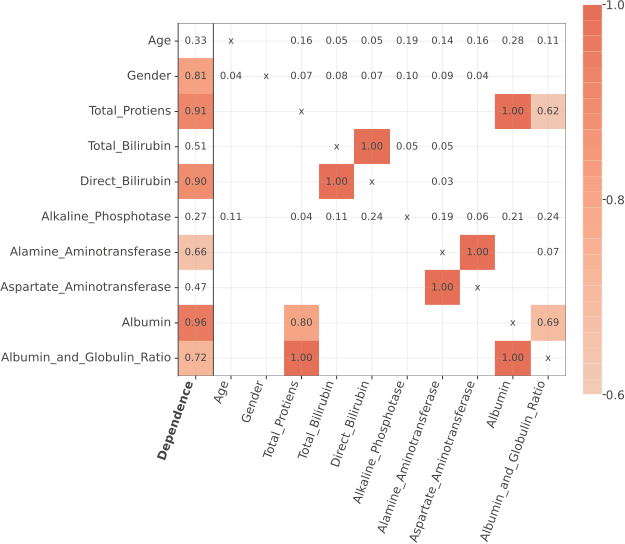

In [40]:
rfpimp.plot_dependence_heatmap(rfpimp.feature_dependence_matrix(X_train), figsize=(9,9), label_fontsize=12, value_fontsize=10)

In [41]:
cols_to_remove = ["Total_Protiens","Albumin_and_Globulin_Ratio","Aspartate_Aminotransferase","Direct_Bilirubin"]

In [42]:
X_train.drop(cols_to_remove, axis=1, inplace=True)

In [394]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data)

                    feature       VIF
0                       Age  1.085410
1                    Gender  1.011487
2           Total_Bilirubin  1.133475
3      Alkaline_Phosphotase  1.085510
4  Alamine_Aminotransferase  1.070275
5                   Albumin  1.129816


In [378]:
X_train.drop(["Albumin"], axis=1, inplace=True)

In [187]:
X_train

,Age,Gender,Total_Protiens,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio
0,1.569722,1,-0.431213,-0.101047,-0.108096,0.266508,-0.115311,-0.190819,-1.073209
1,-0.405354,1,-0.887263,-0.379157,-0.421622,0.053968,-0.353267,-0.284244,0.186402
2,-1.146008,1,-3.349935,-0.425508,-0.491295,-0.718902,-0.353267,-0.299815,1.131110
3,-1.331171,1,1.119358,-0.348256,-0.351950,-0.405889,-0.241884,-0.234417,0.816207
4,1.693165,1,-0.613633,-0.410058,-0.491295,-0.386568,-0.327953,-0.253102,-1.388111
...,...,...,...,...,...,...,...,...,...
619,-1.207729,0,0.692424,-0.393809,-0.454659,-0.564364,-0.288496,-0.284244,1.793446
620,1.143713,1,-0.475830,-0.376134,-0.446234,-0.412822,-0.181791,-0.228359,2.721357
621,-1.237037,1,1.351207,-0.285417,-0.298819,-0.427500,-0.280492,-0.269248,0.496024
622,-0.558019,1,-0.066373,-0.387292,-0.456458,-0.426031,-0.286644,-0.276859,1.147818


# Seleção de features

In [45]:
import phik

In [46]:
df.phik_matrix()['Dataset'].sort_values(ascending=False)

interval columns not set, guessing: ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']


Dataset                       1.000000
Direct_Bilirubin              0.281470
Alkaline_Phosphotase          0.265722
Age                           0.263020
Albumin                       0.203455
Total_Bilirubin               0.175494
Albumin_and_Globulin_Ratio    0.169030
Alamine_Aminotransferase      0.151984
Aspartate_Aminotransferase    0.129931
Gender                        0.103720
Total_Protiens                0.000000
Name: Dataset, dtype: float64

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf = RandomForestClassifier()

In [396]:
rf.fit(X_train,y_train)
importances = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
importances

Total_Bilirubin             0.236103
Alkaline_Phosphotase        0.230369
Alamine_Aminotransferase    0.192084
Age                         0.175164
Albumin                     0.144448
Gender                      0.021832
dtype: float64

In [ ]:
from sklearn import feature_selection

In [397]:
mic = feature_selection.mutual_info_classif(X_train, y_train)
df_mic = pd.DataFrame({"feature": X_train.columns, "vimp": mic})
print(df_mic.sort_values(by='vimp',ascending=False))

                    feature      vimp
2           Total_Bilirubin  0.198170
4  Alamine_Aminotransferase  0.187456
0                       Age  0.148553
5                   Albumin  0.119289
3      Alkaline_Phosphotase  0.093284
1                    Gender  0.000000


In [407]:
X_train.drop(["Gender"], axis=1, inplace=True)

# Teste dos algoritmos

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [408]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier()

parameters = {'strategy':['stratified', 'most_frequent', 'prior', 'uniform', 'constant']}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(dc, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.506068963930806 para {'strategy': 'uniform'}


In [409]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C':[0.001,0.009,0.01,0.09,1,5,10,25]
}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lr, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6628857291656203 para {'C': 25, 'penalty': 'l2'}


In [410]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[3,5,7]}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7350027643072646 para {'n_neighbors': 3}


In [411]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

parameters = {'var_smoothing': np.logspace(0,-9,num=100)}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(gnb, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.561358999273667 para {'var_smoothing': 0.0006579332246575676}


In [412]:
from sklearn.svm import SVC

svm = SVC()

parameters = {'kernel':['linear', 'poly','rbf'],
             'C': [0.1, 1, 0.01],
             'gamma': [1, 0.1, 0.01]}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6981705445949651 para {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [413]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

parameters = {'n_estimators':[50,100,200,300,400,500],
              'learning_rate': [0.1,0.01,0.05,0.5,0.025]}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(abc, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.7627853517555921 para {'learning_rate': 0.5, 'n_estimators': 500}


In [414]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

parameters = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(sgdc, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.6932221924365546 para {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l1'}


In [50]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

parameters = {
    'n_estimators': [100, 200, 500, 600],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    #'reg_alpha': [0, 0.5, 1]#,
    #'reg_lambda': [0.5, 1, 5]#,
    #'base_score': [0.2, 0.5, 1]
}

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgbc, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

[08:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Melhor: 0.8186541251320232 para {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 600}


In [416]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 60, 100, None],
 'max_features': ['auto', 'sqrt'],
 #'min_samples_leaf': [1, 2, 4],
 #'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400]
             }

kfold = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, parameters, scoring='f1', n_jobs=-1, cv= kfold)
grid_result = grid_search.fit(X_train, y_train)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8156881889147624 para {'bootstrap': True, 'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 400}


# Avaliação do modelo

In [51]:
#alg = RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'sqrt', n_estimators= 200)
#alg = AdaBoostClassifier(learning_rate= 0.01, n_estimators= 200)
alg = XGBClassifier(gamma= 0, learning_rate= 0.05, n_estimators= 600)
alg.fit(X_train, y_train)

[08:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
from sklearn.metrics import classification_report

In [53]:
X_test[numeric_cols_name] = scaler.transform(X_test[numeric_cols_name])
X_test[numeric_cols_name] = imputer.transform(X_test[numeric_cols_name])
X_test[object_cols_name]  = ohe.transform(X_test[object_cols_name])

columns_used = X_train.columns

y_pred = alg.predict(X_test[columns_used])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.75      0.74        83
           2       0.36      0.35      0.36        34

    accuracy                           0.63       117
   macro avg       0.55      0.55      0.55       117
weighted avg       0.63      0.63      0.63       117



In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
conf = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'])

<AxesSubplot:xlabel='Predito', ylabel='Real'>

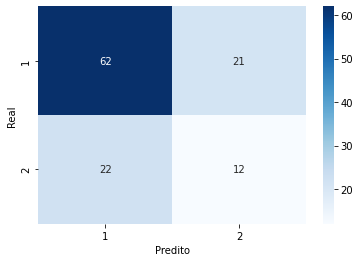

In [56]:
sns.heatmap(conf, annot=True, fmt='.0f', cmap=plt.cm.Blues)

# Explicando o modelo

In [60]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=["Com doença", "Sem doença"],
)

exp = explainer.explain_instance(
    X_train.iloc[-1].values, alg.predict_proba
)

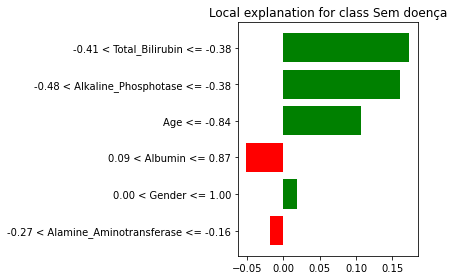

In [61]:
fig = exp.as_pyplot_figure()
fig.tight_layout()